<a href="https://colab.research.google.com/github/hagrian/kaggle-api/blob/master/AG_Lab3_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Laboratory Exercise - 3**

**Instructions**

The research question is ***can we use algorithms and compute to identify clothing items? Specifically, can we determine which algorithm and compute methodology provides us the most efficient approach for classifying simple fashion images?***

Using the base samples available from Zalando Research:

*    https://github.com/zalandoresearch/fashion-mnist
*    Review the data – clean as appropriate


## Load Tensorflow, Keras and a other Libraries 


In [190]:
from __future__ import  absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Other libraries
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)



1.13.1


## Import the Fashion MNIST dataset
The dataset  contains 70,000 grayscale images in 10 categories.

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

**Let's add class names**

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents

**Label Description **

0 T-shirt/top 
1 Trouser 
2 Pullover 
3 Dress 
4 Coat 
5 Sandal 
6 Shirt 
7 Sneaker 
8 Bag 
9 Ankle boot

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Explore the data**

In [193]:
train_images.shape

(60000, 28, 28)

In [194]:
len(train_labels)

60000

In [195]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [196]:
test_images.shape

(10000, 28, 28)

In [197]:
len(test_labels)

10000

## Preprocess the data

The data needs to be preprocessed before training the network.

<function matplotlib.pyplot.show>

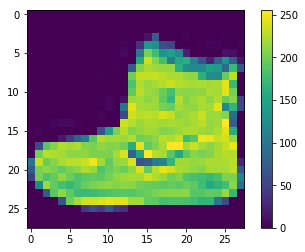

In [198]:
#inspect the first image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show

The scaled values in a range of 0 to 1. To do this, the values divided by (28x28=255)

In [0]:
train_images = train_images / 255.0
test_images = test_images /255.0

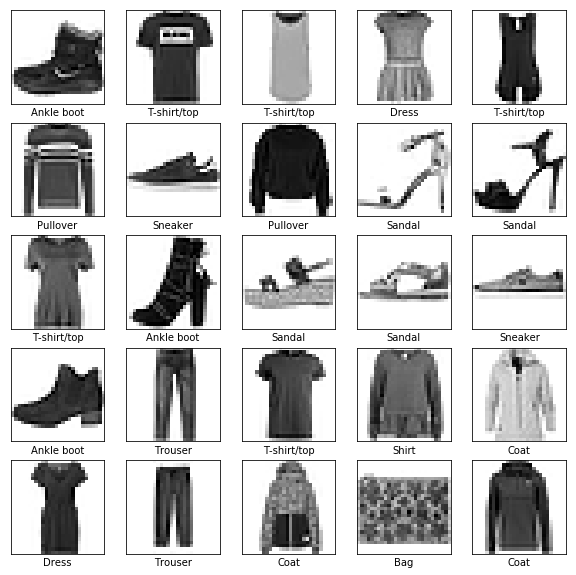

In [200]:
# Let's display the first 25 images from the traning set 
# to verify that the data is in the correct format
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


## Built the model

**Implement at least two approaches for classifying the digits** – examples below:

*  Naïve bayes
*  Neural Networks
*   Keras
*   Azure ML
*   IBM DSX
*  Boosted trees
*   Linear classification
*   Your choice

# Model I

## TensorFlow Keras

**Set up the layers**
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. 



In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),# The first layer, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels.
    keras.layers.Dense(128, activation=tf.nn.relu),# First fully-connected neural layer has 128 nodes (or neurons)
    keras.layers.Dense(10, activation=tf.nn.softmax) # The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1
])

#Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

**Compile the model**

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

**Loss function**   —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.

**Optimizer**  —This is how the model is updated based on the data it sees and its loss function.

**Metrics** —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Train the Model**

Train the neural network model

In [203]:
model.fit(train_images, train_labels, epochs=5) #  epochs: Integer. Number of epochs to train the model.

Epoch 1/5
60000/60000 [==============================] - 10s 159us/sample - loss: 0.4944 - acc: 0.8262
Epoch 2/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.3730 - acc: 0.8649
Epoch 3/5
60000/60000 [==============================] - 10s 164us/sample - loss: 0.3368 - acc: 0.8783
Epoch 4/5
60000/60000 [==============================] - 10s 160us/sample - loss: 0.3126 - acc: 0.8863
Epoch 5/5
60000/60000 [==============================] - 9s 158us/sample - loss: 0.2947 - acc: 0.8914


###  Accuracy of the model
The model has an accuracy of about 0.89.25 (or **89.25%**) on the training data

## Evaluate the accuracy
Let's compare how the model performs on the test dataset

In [204]:
test_loss, test_acc =model.evaluate(test_images, test_labels)

print('Test accuracy: ', test_acc)

10000/10000 [==============================] - 1s 58us/sample - loss: 0.3580 - acc: 0.8711
Test accuracy:  0.8711


**The Accuracy on the Test dataset**

Apperantly,  **the accuracy on the test dataset is a little less than the accuracy on the training dataset, which is 87.42%.** This gap between training accuracy and test accuracy is an example of **overfitting**. 

Overfitting is when a machine learning model performs worse on new data than on their training data.

## Let's Make Predictions
make predictions about some images

In [0]:
predictions = model.predict(test_images)

In [206]:
# Let's take a look at the first prediction
predictions[0]

array([2.8376273e-06, 1.4326816e-08, 1.1887979e-06, 1.9731621e-08,
       5.5640839e-07, 1.5428230e-02, 1.2915802e-06, 4.3751966e-02,
       2.0538011e-05, 9.4079340e-01], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [207]:
np.argmax(predictions[0])

9

Evidently,  the model is most confident that **this image is an ankle boot.**
Let's check the test label to see this is correct:

In [208]:
test_labels[0]

9

Looks good, the first image is an **ankle boot**

**Lets graph the full set of 10 class predictions**

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the first image [0], predictions, and prediction array

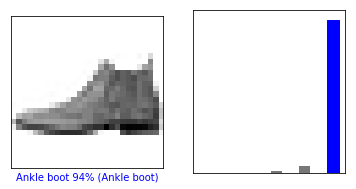

In [210]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

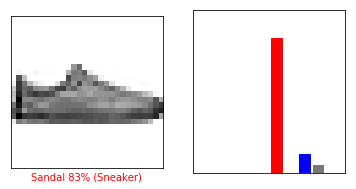

In [211]:
# let try for the 13th image
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

Let's plot several images with their predictions. **Correct prediction labels are blue** and **incorrect prediction labels are red.** 

The number gives the percent (out of 100) for the predicted label.

Note that **it can be wrong even when very confident.**

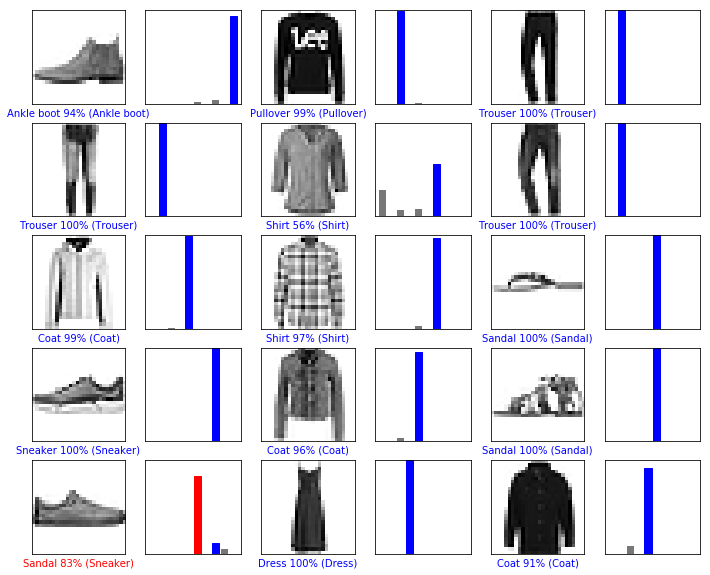

In [212]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Let's use the trained model to make a prediction about a single image.

In [213]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [214]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


**Predict the image**

In [215]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.83762733e-06 1.43267895e-08 1.18879666e-06 1.97316208e-08
  5.56407826e-07 1.54282143e-02 1.29157786e-06 4.37519215e-02
  2.05379893e-05 9.40793395e-01]]


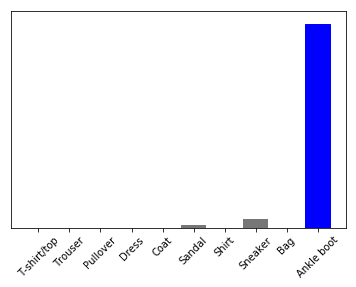

In [216]:
# Let's plot the single prediction
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [217]:
#Let's evaluate the highest prediction of the batch
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9


Looks good, the model predicts a label of 9, which is an ankle boot as it before.

## Interpret 

Let's build a function for plotting the result of the model.


# Model II

## TensorFlow Linear Model

Load the dataset


In [147]:
%%bash
rm -r data/fashion

rm: cannot remove 'data/fashion': No such file or directory


**Loading data with Tensorflow**

The  downloaded  data must be placed it in data/fashion. Otherwise, Tensorflow will download and use the original MNIST.

In [148]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

tf.logging.set_verbosity(tf.logging.INFO)

print(tf.__version__)



base_model_dir = "data/fashion"

1.13.1


In [0]:
feature_columns = [
    tf.feature_column.numeric_column(
        "pixels", shape=784)]

In [150]:
classifier = tf.estimator.LinearClassifier(
  feature_columns = feature_columns,
  n_classes=10, # 10 different possible classes for the label
  model_dir=base_model_dir + "linear")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'data/fashionlinear', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fd6fa3f19e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
def make_input_fn(data, batch_size, num_epochs, shuffle):
    return tf.estimator.inputs.numpy_input_fn(
             x={'pixels': data.images},
             y=data.labels.astype(np.int64),
             batch_size=batch_size,
             num_epochs=num_epochs,
             shuffle=shuffle)

In [152]:
#DATA_SETS=input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')
#DATA_SETS= mnist = input_data.read_data_sets("/tmp/data1/", one_hot=True, source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')
#DATA_SETS= input_data.read_data_sets("/Users/HAG/Desktop/Spring2019/IST718BigData/HWs/C5W9Lab/fashion-mnist-master/data/fashion")
DATA_SETS = input_data.read_data_sets("/Users/HAG/data/fashion")
#DATA_SETS = input_data.read_data_sets("data/fashion")

Extracting /Users/HAG/data/fashion/train-images-idx3-ubyte.gz
Extracting /Users/HAG/data/fashion/train-labels-idx1-ubyte.gz
Extracting /Users/HAG/data/fashion/t10k-images-idx3-ubyte.gz
Extracting /Users/HAG/data/fashion/t10k-labels-idx1-ubyte.gz


## Classifier and the Accuracy

In [153]:
classifier.train(input_fn=make_input_fn(DATA_SETS.train, 
                               batch_size=100, 
                               num_epochs=2, 
                               shuffle=True))

accuracy_score = classifier.evaluate(
    input_fn=make_input_fn(
        DATA_SETS.test, 
        batch_size=100, 
        num_epochs=1, 
        shuffle=False))['accuracy']

print(accuracy_score)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from data/fashionlinear/model.ckpt-4400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4400 into data/fashionlinear/model.ckpt.
INFO:tensorflow:loss = 34.544678, step = 4401
INFO:tensorflow:global_step/sec: 316.811
INFO:tensorflow:loss = 23.2266, step = 4501 (0.318 sec)
INFO:tensorflow:global_step/sec: 339.907
INFO:tensorflow:loss = 30.354553, step = 4601 (0.295 sec)
INFO:tensorflow:global_step/sec: 300.041
INFO:tensorflow:loss = 45.704437, step = 4701 (0.337 sec)
INFO:tensorflow:global_step/sec: 321.989
INFO:tensorflow:loss = 20.881525, step = 4801 (0.306 sec)
INFO:tensorflow:global_step/sec: 333.17
INFO:tensorflow:loss = 23.921946, step = 4901 (0.303 sec)
INFO:tensorflow:global_step/sec: 340.072
INFO:tensorflow:loss = 32.1

**Let's look at the accuracy**

*      **92.62% accuracy** . The Linear model looks realtively accurate.

# Model III

## Deep Neural Network-DNN Classifier

In [154]:
deep_classifier = tf.estimator.DNNClassifier(
        feature_columns=feature_columns, 
        n_classes=10,
        hidden_units=[100, 75, 50],
        model_dir=base_model_dir + "deep"
    )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'data/fashiondeep', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fd6f9e17240>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


**Train the DNN Classifier**

In [155]:

deep_classifier.train(input_fn=make_input_fn(DATA_SETS.train, batch_size=100, num_epochs=2, shuffle=True))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from data/fashiondeep/model.ckpt-3300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3300 into data/fashiondeep/model.ckpt.
INFO:tensorflow:loss = 6.4858823, step = 3301
INFO:tensorflow:global_step/sec: 194.559
INFO:tensorflow:loss = 3.4468882, step = 3401 (0.516 sec)
INFO:tensorflow:global_step/sec: 213.444
INFO:tensorflow:loss = 3.0807104, step = 3501 (0.469 sec)
INFO:tensorflow:global_step/sec: 214.066
INFO:tensorflow:loss = 2.9931421, step = 3601 (0.471 sec)
INFO:tensorflow:global_step/sec: 219.972
INFO:tensorflow:loss = 4.979453, step = 3701 (0.450 sec)
INFO:tensorflow:global_step/sec: 219.483
INFO:tensorflow:loss = 4.195735, step = 3801 (0.455 sec)
INFO:tensorflow:global_step/sec: 216.357
INFO:tensorflow:loss = 14.4666

## Accuracy 

In [156]:

accuracy_score = deep_classifier.evaluate(input_fn=make_input_fn(DATA_SETS.test, batch_size=100, num_epochs=1, shuffle=False))['accuracy']

print(accuracy_score)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-02T16:38:44Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from data/fashiondeep/model.ckpt-4400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-02-16:38:45
INFO:tensorflow:Saving dict for global step 4400: accuracy = 0.9714, average_loss = 0.09980279, global_step = 4400, loss = 9.980279
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4400: data/fashiondeep/model.ckpt-4400
0.9714


*      **97.14% accuracy** .Apperantly, the DNN model seems more accurate than the Linear Model.

## Prediction

In [157]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn(        
        x={'pixels': DATA_SETS.test.images[5000:5005]},
        batch_size=1,
        num_epochs=1,
        shuffle=False)
predictions = deep_classifier.predict(input_fn=predict_input_fn)

for prediction in predictions:
    print("Predictions:    {} with probabilities {}\n".format(
        prediction["classes"], prediction["probabilities"]))
print('Expected answers values: {}'.format(
    DATA_SETS.test.labels[5000:5005]))
  

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from data/fashiondeep/model.ckpt-4400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predictions:    [b'3'] with probabilities [1.5949964e-11 2.2381606e-08 1.9674955e-08 9.9999619e-01 3.4887798e-11
 3.0397557e-06 3.5636031e-13 8.5033791e-10 2.4846202e-08 6.8948845e-07]

Predictions:    [b'9'] with probabilities [8.6142400e-06 4.1864982e-06 1.1619961e-05 3.7277681e-05 6.2438552e-03
 1.3175946e-05 6.8635089e-08 6.7460387e-06 2.0495688e-03 9.9162489e-01]

Predictions:    [b'9'] with probabilities [3.7824455e-09 7.4125472e-10 1.0934019e-08 1.0548690e-08 4.1404855e-06
 2.3850239e-11 4.6680758e-14 1.3499181e-09 3.5298747e-08 9.9999583e-01]

Predictions:    [b'8'] with probabilities [1.0572155e-09 7.1485812e-10 2.5763097e-07 1.2856511e-06 1.2562117e-10
 4.4921440e-09 3.1655501e-11 8.5197231e-11 9.9999809e-01 3.13

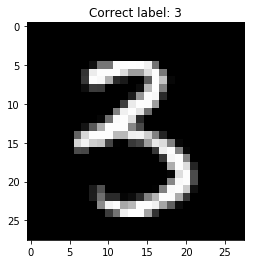

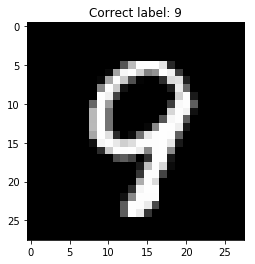

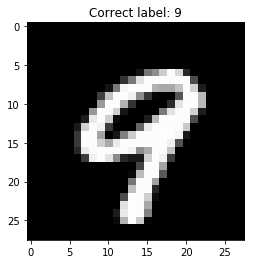

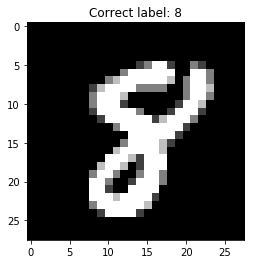

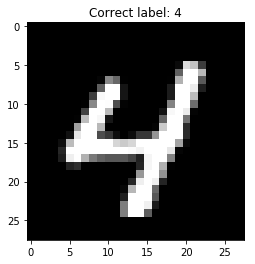

In [158]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(5000,5005):
    sample = np.reshape(DATA_SETS.test.images[i], (28,28))
    plt.figure()
    plt.title("Correct label: {}".format(DATA_SETS.test.labels[i]))
    plt.imshow(sample, 'gray')

*      **97.14% accuracy** . It seems the model is pretty accurate. Apparently, the DNN classifier seems more accurate than the Linear classifier


 
# **Answer the following questions**
*   **What is the accuracy of each method?**




*   Keras  :89.12
*   Linear : 92.36%
*   **DNN:97.14%**





*   **What are the trade-offs of each approach?**

Keras  classifier iteration takes more time than both Linear and DNN. DNN seems relatively more accurate and faster than any other models. However, high accuaracy has a high overfitting risk too.

*   **What is the compute performance of each approach?**

*   Keras Classifier : 41.56 seconds 
*   DNN Classifier   : 6.986 seconds
*   Linear Classifier: 4.798 seconds

